In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = "/content/recruitmentdataset-2022-1.3.csv"
df_data = pd.read_csv(data_path, delimiter=",")
df_data = df_data.drop(['Id','company'], axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_data

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,female,28,Dutch,Running,63,False,False,False,False,0,False,master,False
3996,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,False
3997,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,False
3998,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,False


In [ ]:
def stat_parity(preds, sens):
    '''
    :preds: numpy array of the model predictions. Consisting of 0s and 1s
    :sens: numpy array of the sensitive features. Consisting of 0s and 1s
    :return: the statistical parity. no need to take the absolute value
    '''

    pos_pred1 = preds[sens == 0].mean()
    pos_pred2 = preds[sens == 1].mean()
    return pos_pred1-pos_pred2

In [ ]:
def eq_oppo(preds, sens, labels):
    '''
    :preds: numpy array of the model predictions. Consisting of 0s and 1s
    :sens: numpy array of the sensitive features. Consisting of 0s and 1s
    :labels: numpy array of the ground truth labels of the outcome. Consisting of 0s and 1s
    :return: the statistical parity. no need to take the absolute value
    '''

    # TODO. 7.5pts

    true_positives_g1 = ((preds == 1) & (labels == 1) & (sens == 0)).sum()
    possible_positives_g1 = ((labels == 1) & (sens == 0)).sum()
    tpr_g1 = true_positives_g1 / possible_positives_g1 if possible_positives_g1 > 0 else 0



    true_positives_g2 = ((preds == 1) & (labels == 1) & (sens == 1)).sum()
    possible_positives_g2 = ((labels == 1) & (sens == 1)).sum()
    tpr_g2 = true_positives_g2 / possible_positives_g2 if possible_positives_g2 > 0 else 0

    return tpr_g2 - tpr_g1

In [ ]:
# lang_acceptance = df_data.groupby('ind-languages')['decision'].mean().reset_index()
lang_acceptance_male = df_data[df_data['gender'] == 'male'].groupby('ind-languages')['decision'].mean().reset_index()
lang_acceptance_female = df_data[df_data['gender'] == 'female'].groupby('ind-languages')['decision'].mean().reset_index()

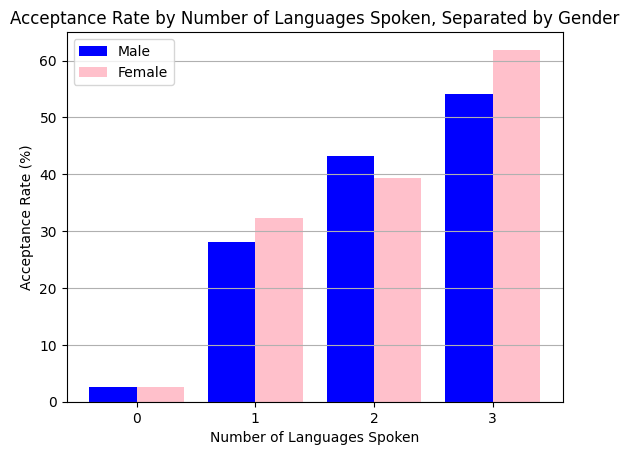

In [ ]:
positions_male = lang_acceptance_male['ind-languages'] - 0.2
positions_female = lang_acceptance_female['ind-languages'] + 0.2

# Plotting male data
plt.bar(positions_male,
        lang_acceptance_male['decision'] * 100,
        color='blue',
        width=0.4,
        label='Male')

# Plotting female data
plt.bar(positions_female,
        lang_acceptance_female['decision'] * 100,
        color='pink',
        width=0.4,
        label='Female')

plt.xlabel('Number of Languages Spoken')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Number of Languages Spoken, Separated by Gender')

# Generating x-ticks based on the unique positions of language counts from both male and female data
all_languages = sorted(set(lang_acceptance_male['ind-languages']).union(set(lang_acceptance_female['ind-languages'])))
plt.xticks(all_languages)
plt.legend()
plt.grid(axis='y')

plt.show()

speechless

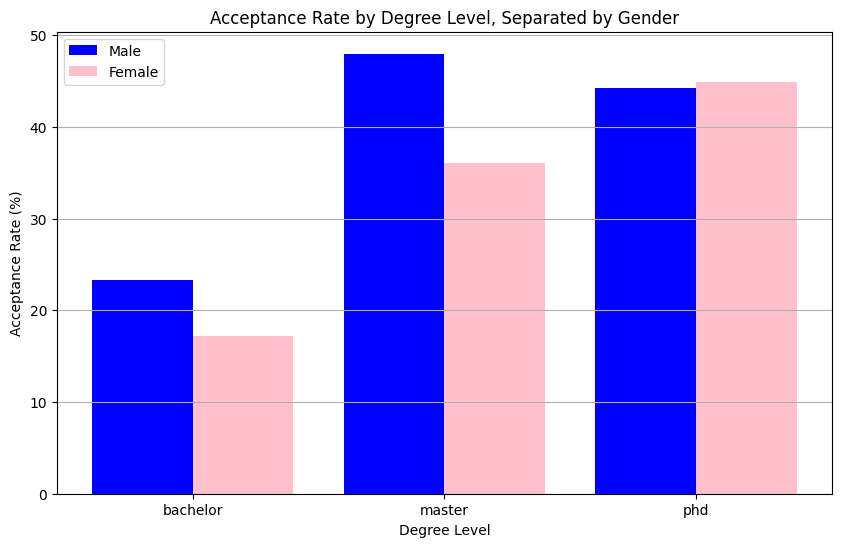

In [ ]:
degree_acceptance_male = df_data[df_data['gender'] == 'male'].groupby('ind-degree')['decision'].mean().reset_index()
degree_acceptance_female = df_data[df_data['gender'] == 'female'].groupby('ind-degree')['decision'].mean().reset_index()

# Adjusting positions for male and female bars for clarity
# Note: Using a small offset for degree levels may not work as they are categorical. Instead, we will plot them side by side.
positions = range(len(degree_acceptance_male))  # Base positions for each degree

plt.figure(figsize=(10, 6))

# Plotting male data
plt.bar([p - 0.2 for p in positions],
        degree_acceptance_male['decision'] * 100,
        color='blue',
        width=0.4,
        label='Male')

# Plotting female data
plt.bar([p + 0.2 for p in positions],
        degree_acceptance_female['decision'] * 100,
        color='pink',
        width=0.4,
        label='Female')

plt.xlabel('Degree Level')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Degree Level, Separated by Gender')

# Generating x-ticks based on the degree levels. Assuming the degrees are the same across genders.
plt.xticks(positions, degree_acceptance_male['ind-degree'])
plt.legend()
plt.grid(axis='y')

plt.show()

As someone deeply concerned about gender equality in the workplace, the statistics on hiring acceptance rates based on education level and gender are quite troubling. For those holding bachelor's degrees, only 18% of female applicants get hired compared to 25% of males - a significant 7 percentage point gap. The disparity continues at the master's level, where 36% of women get hired versus a staggering 48% of men.

These numbers point to clear systemic biases against women in the hiring process, at least at the bachelor's and master's degree levels. With equivalent educational qualifications, women are being passed over for roles that their male counterparts are securing at much higher rates. The reasons behind this are complex, but likely stem from deep-rooted societal biases, inadequate professional networks and mentorship for women, and perhaps even discrimination during the interview process itself.

Interestingly, the one bright spot is that there appears to be more gender parity for those with doctoral degrees. This could suggest that ultimately, elite educational credentials and highly specialized expertise can help override gender biases during hiring to some degree. Or it may simply reflect the relatively small sample sizes of PhD holders.

Regardless, these statistics lay bare an unfortunate reality - despite decades of progress, gender discrimination remains deeply entrenched in many sectors when it comes to hiring and career advancement, particularly early on. Clearly much more work needs to be done by employers, policymakers and society at large to finally achieve true equal opportunity regardless of gender. The costs of failing to fully capitalize on the talents of over half the workforce are much too high.

<ipython-input-10-50579bd2eebb>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_updated = df_updated.corr()


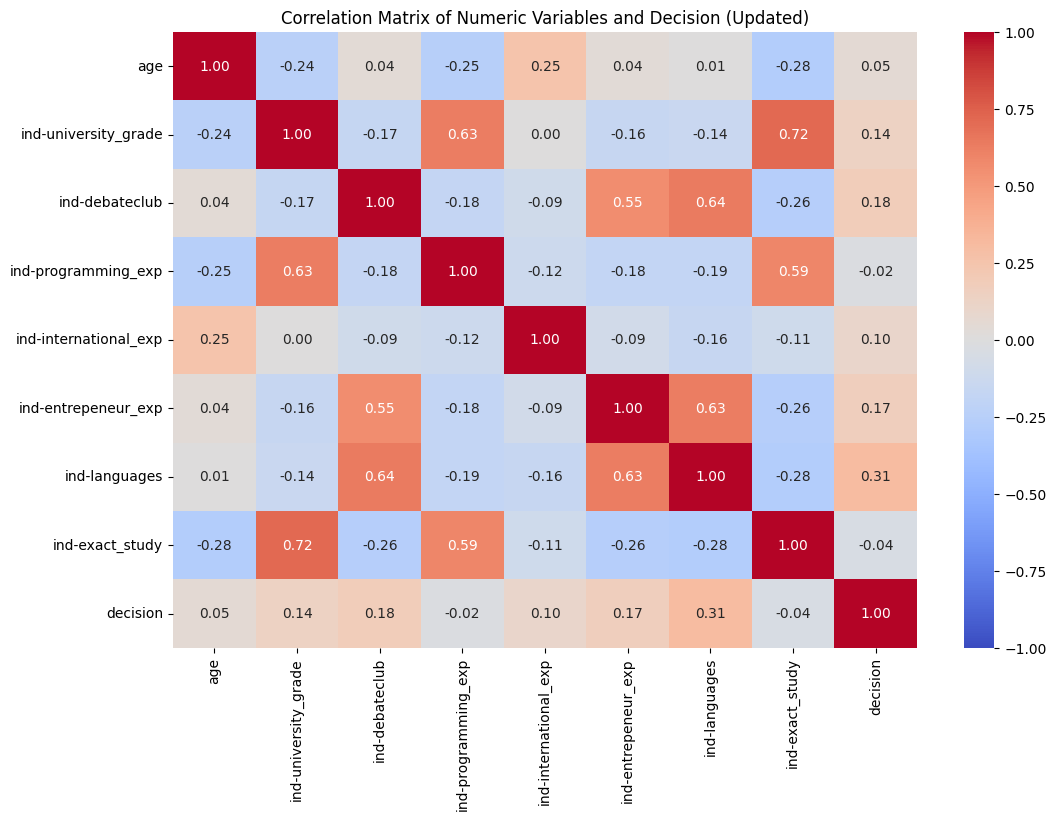

In [ ]:
df_updated = df_data
df_updated['ind-debateclub'] = df_updated['ind-debateclub'].astype(int)
df_updated['ind-programming_exp'] = df_updated['ind-programming_exp'].astype(int)
df_updated['ind-international_exp'] = df_updated['ind-international_exp'].astype(int)
df_updated['ind-exact_study'] = df_updated['ind-exact_study'].astype(int)
df_updated['decision'] = df_updated['decision'].astype(int)
corr_matrix_updated = df_updated.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f", vmax=1, vmin=-1)
plt.title('Correlation Matrix of Numeric Variables and Decision (Updated)')
plt.show()


While the 'decision' variable in the heatmap does not exhibit a strong correlation with any of the individual variables, this does not necessarily imply an absence of bias in the decision-making process. The lack of strong correlation could indicate that the recruitment process is not heavily influenced by any single factor present in this dataset. However, it is possible that other unmeasured factors or variables not included in the dataset may play a role in influencing the recruitment decisions. The absence of strong correlation with the variables in the heatmap does not conclusively rule out the existence of biases. There could be underlying factors or a combination of factors that contribute to biases in the recruitment process, which are not captured in the current dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = df_data
df_numeric = pd.get_dummies(df.drop("decision", axis=1))
df_numeric["decision"] = df["decision"].astype(int)

In [ ]:
correlation = df_numeric.corr()["decision"].sort_values()

In [ ]:
df

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,female,28,Dutch,Running,63,False,False,False,False,0,False,master,False
3996,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,False
3997,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,False
3998,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,False


In [ ]:
from sklearn.linear_model import LogisticRegression
df_male = df_numeric[df['gender'] == 'male']
df_female = df_numeric[df['gender'] == 'female']

# Prepare the features and target variables
X_train = df_male.drop('decision', axis=1).values
y_train = df_male['decision'].values

X_test = df_female.drop('decision', axis=1).values
y_test = df_female['decision'].values

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the outcomes
dt_accuracy = accuracy_score(y_test, y_pred_dt)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

print("Decision Tree Accuracy (Male train, Female test):", dt_accuracy)
print("Logistic Regression Accuracy (Male train, Female test):", log_reg_accuracy)

Decision Tree Accuracy (Male train, Female test): 0.6882681564245811
Logistic Regression Accuracy (Male train, Female test): 0.7581005586592179


In [ ]:
true_decisions_dt = sum(y_pred_dt)
true_decisions_log_reg = sum(y_pred_log_reg)
print(f"Decision Tree predicted 'True' decisions: {true_decisions_dt}")
print(f"Logistic Regression predicted 'True' decisions: {true_decisions_log_reg}")

Decision Tree predicted 'True' decisions: 552
Logistic Regression predicted 'True' decisions: 243


In [ ]:
true_predictions_dt = sum(y_pred_dt)
true_predictions_log_reg = sum(y_pred_log_reg)

# Calculating the actual number of 'True' values in the test set
actual_trues = sum(y_test)

# Calculating the difference between predicted 'True' values and actual 'True' values
difference_dt = true_predictions_dt - actual_trues

print("Difference in 'True' predictions (Decision Tree):", difference_dt)


Difference in 'True' predictions (Decision Tree): 60
Difference in 'True' predictions (Logistic Regression): -249


In [ ]:
df = df_data

# One-hot encoding for categorical variables and drop 'gender'
df_processed = pd.get_dummies(df.drop(['gender'], axis=1))

# Prepare the features and target variables
X = df_processed.drop('decision', axis=1).values
y = df_processed['decision'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


ratio_true_dt = sum(y_pred_dt) / len(y_pred_dt)
actual_ratio_true = sum(y_test) / len(y_test)

print("Actual ratio of 'True' decisions:", actual_ratio_true)

print("Ratio of 'True' decisions (Decision Tree):", ratio_true_dt)

Actual ratio of 'True' decisions: 0.29924242424242425
Ratio of 'True' decisions (Decision Tree): 0.3106060606060606


While the actual proportion of positive recruitment decisions (0.299) is slightly lower than the proportion predicted by the Decision Tree model (0.311), the discrepancy is relatively small. However, if this pattern persists across larger datasets or over an extended period, it could indicate a tendency for the model to slightly overestimate the likelihood of a favorable recruitment outcome. There is also a possibility that the Decision Tree model may be overfitting the training data, leading it to capture noise or random fluctuations rather than the underlying patterns. Such overfitting could result in skewed predictions for the ratio of positive recruitment decisions, potentially giving rise to incorrect assumptions about biases within the recruitment process. Ultimately, to gain a comprehensive understanding of potential biases, it is essential to consider a broader context beyond the variables included in the current dataset, encompassing factors such as the qualifications of applicants relative to decisions made, diversity of the candidate pool, decision-making criteria employed, and consistent application of criteria across different groups.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

Index(['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'decision'],
      dtype='object')

In [ ]:
degree_mapping = {'bachelor': 1, 'master': 2, 'phd': 3}
df['ind-degree'] = df['ind-degree'].map(degree_mapping)


In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in ['gender', 'nationality', 'sport']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Prepare features and target
X = df.drop('decision', axis=1)
y = df['decision']
df['decision'] = df['decision'].astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict outcomes
y_pred = dt.predict(X_test)

In [ ]:
sens_attr = X_test['gender']

# Statistical Parity
stat_parity_value = stat_parity(y_pred, sens_attr)
print('Statistical Parity:', stat_parity_value)

# Equal Opportunity
eq_oppo_value = eq_oppo(y_pred, sens_attr, y_test)
print('Equal Opportunity:', eq_oppo_value)


Statistical Parity: -0.05816162024919885
Equal Opportunity: -0.03191489361702127


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict outcomes
y_pred = log_reg.predict(X_test)
sens_attr = X_test['gender']

# Statistical Parity
stat_parity_value = stat_parity(y_pred, sens_attr)
print('Statistical Parity:', stat_parity_value)

# Equal Opportunity
eq_oppo_value = eq_oppo(y_pred, sens_attr, y_test)
print('Equal Opportunity:', eq_oppo_value)

Statistical Parity: -0.12059839045499343
Equal Opportunity: 0.13434880722114761
